In [1]:
%load_ext autoreload
%autoreload 2
import sys
dirr = "../../src"
if dirr not in sys.path:
    sys.path.append(dirr)
%xmode Plain
import pandas as pd
import numpy as np
import numpy.random as npr
import utils as helper
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Exception reporting mode: Plain


# Q1
Link to the [pdf](https://drive.google.com/file/d/1YhLUJuHG-geJgn1pXUl7KHdrrjGvUgQr/view?usp=sharing)

---

# Q2
a) Solution by sk-learn

In [2]:
X = [[1, 2],
     [2, 4],
     [3, 6],
     [4, 8]]
y = [2,3,4,5]
X = np.array(X)
y = np.array(y)
# Setting up data

In [3]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
lr.predict([[2,4.4]])

array([3.16])

---
# Q2
b) Using normal Equations.

We get ``LinAlgError`` because the matrix $X.X^{T}$ is singular, therefore inverting such a matrix would fail.

In [5]:
from lregress import normalEquationRegression
theta = normalEquationRegression(X, y)
theta

LinAlgError: Singular matrix

Sk-learn overcomes this problem by using a different technique to calculate inverses, called [Moore–Penrose pseudo inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse).

---
# Q3
a) Running Sk-learn on real-estate price prediction problem.

In [6]:
data_loc = "../../data/real_estate/dataset.xlsx"
data = pd.read_excel(data_loc)
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]
tupl = train_test_split(X, y)
X_train, X_test, y_train, y_test = tupl
X_train.head(5)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
356,2012.833333,10.3,211.4473,1,24.97417,121.52999
152,2013.333333,12.0,1360.1390,1,24.95204,121.54842
126,2013.083333,38.6,804.6897,4,24.97838,121.53477
364,2013.416667,35.3,614.1394,7,24.97913,121.53666
123,2013.416667,0.0,185.4296,0,24.97110,121.53170


In [7]:
def rmse(pred, true):
    return np.sqrt(np.mean((pred-true)**2))

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("The RMSE error obtained is: ", rmse(y_pred, y_test.values))

The RMSE error obtained is:  7.137472504145238


In [9]:
print(lr.coef_)
print(lr.intercept_)

[ 5.90716451e+00 -2.60249095e-01 -4.86518419e-03  9.78288202e-01
  2.20094114e+02 -1.65014835e+01]
-15337.93656328878


---
# Q3
b) To assume that the co-efficients learnt signify the importance of the feature is wrong. This can be shown by thinking of a example where on of the feature measures some quantities in ``centimeters`` and the same feature is converted to ``inches`` in the next curve fitting. Since we already know the importance of the feature would not change by the unit it is measured in but the co-efficients would get changed. Here by taking a feature in a different unit, the importance of the feature can be decreased (stated in the question) is a contradiction as clearly importance of a feature is not dependent on the unit it is measured. There for the coefficients don't tell us anything about the importance of the features.

In [10]:
coef_ = lr.coef_
print("The coeffs learnt are the following: ")
coef_

The coeffs learnt are the following: 


array([ 5.90716451e+00, -2.60249095e-01, -4.86518419e-03,  9.78288202e-01,
        2.20094114e+02, -1.65014835e+01])

---
# Q3
c) Scaling the numerical columns of the Data Frame.

In [11]:
# scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])
tupl = train_test_split(X, y)
X_train, X_test, y_train, y_test = tupl
X_train.head(3)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
30,0.909091,0.591324,0.695523,0.0,0.196195,0.240889
352,0.181818,0.420091,0.410167,0.3,0.355793,0.374596
107,0.727273,0.278539,0.206780,0.1,0.242002,0.807526


In [12]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
coef_ = lr.coef_
print("The coeffs learnt are the following: ")
coef_

The coeffs learnt are the following: 


array([  5.27239032, -10.31532535, -26.20952979,  14.69108618,
        14.25121949,   0.52711944])

---
# Q3
c)
Coefficients learnt on the normalized data still don't ######### 

---
# Q3
d) Distribution of the residuals.

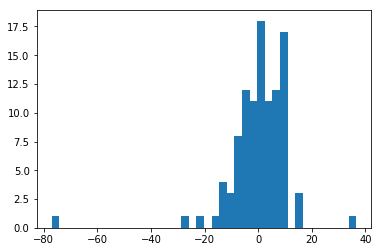

In [13]:
plt.hist(y_pred-y_test, bins=40);

The distribution is mostly centered at 0 with a look of a gaussian (Not sure if it should be, mathematically). We see a noisy sample in our data though, the point that has a error of nearly -75.

One thing that I feel is that if we remove the outlier, the data would be much better fitted. I am able to guess this as we know that our error function is Root Mean Squared, which takes the square of the error, and a larger error would have a much larger affect on our qudratic error function.

# Q3
e) 5 Cross-Validation for hyperparameter selection 

In [14]:
def nested_cross(dTrain, depths, num_valid):
    folds = make_folds(dTrain, num_valid)
    # holding out test
    passed_folds = folds[:-1]
    k = best_k(passed_folds, depths)
    acc = 0
    for i in range(num_valid):
        curr_fold_train = [x for j,x in enumerate(folds) if j!=i] 
        curr_fold_test = folds[i]
        curr_fold_train = pd.concat(curr_fold_train)
        mydt = LinearRegression()
        mydt.fit(curr_fold_train.iloc[:, :-1], curr_fold_train.iloc[:, -1])
        my_preds = np.squeeze(mydt.predict(curr_fold_test.iloc[:, :-1]).values)
        true = curr_fold_test.iloc[:, -1].values
        my_acc = ((true == my_preds).sum())/curr_fold_test.shape[0]
        acc += my_acc/num_valid
    return {"depth": k, "acc": acc}   

def make_folds(dTrain, num_valid):
    '''Make a number of folds with diven pd'''
    train = shuffle(dTrain)
    last = train.shape[0]
    folds = []
    for i in range(num_valid):
        start = i*int(last/num_valid)
        end = (i+1)*int(last/num_valid)
        if end >= last:
            end = -1
        folds.append(train.iloc[start:end, :])
    return folds

def best_k(folds, depths):
    '''return depth that maximizes the avg accuracy'''
    num_valid = len(folds)
    acc = {}
    for i in range(num_valid):
        curr_fold_train = [x for j,x in enumerate(folds) if j!=i] 
        curr_fold_validation = folds[i]
        curr_fold_train = pd.concat(curr_fold_train)
        for k in depths:
            mydt = LinearRegression()
            mydt.fit(curr_fold_train.iloc[:, :-1], curr_fold_train.iloc[:, -1])
            my_preds = mydt.predict(curr_fold_validation.iloc[:, :-1])
            true = curr_fold_validation.iloc[:, -1]
            true = true.values
            my_preds = np.squeeze(my_preds.values)
            assert (true.shape == my_preds.shape)
            my_acc = ((true == my_preds).sum())/curr_fold_validation.shape[0]
            if k in acc.keys():
                acc[k] += my_acc
            else:
                acc[k] = my_acc
    acc = {k: acc[k]/num_valid for k in acc.keys()}
    
    x = acc
    print (acc) # for showcasing
    sorted_by_value = sorted(x.items(), key=lambda kv: kv[1])
    return sorted(x[0] for x in sorted_by_value if sorted_by_value[-1][1] == x[1])[0]

---
# Q4
[Link](https://gist.github.com/k0pch4/4ae7c4929558cfa2c54c9517466b03e6#file-lregress-py) to all the functions below.

a) ``normalEquationRegression(X, y)`` takes in ``X`` and ``y`` and returns a vector ``Theta=[theta0, ..., thetad]`` of dimention 1 more than the number of features in ``X``.

b) ``gradientDescentRegression(X, y, alpha=0.1)`` uses 

In [66]:
from lregress import normalEquationRegression
normalEquationRegression(X_train, y_train)

array([ 31.01721261,   5.27239032, -10.31532535, -26.20952979,
        14.69108618,  14.25121949,   0.52711944])

In [65]:
from lregress import gradientDescentRegression
gradientDescentRegression(X_train, y_train)

array([ 28.84155114,   5.23773521, -10.28164931, -23.96792378,
        14.94653925,  14.941082  ,   2.68577124])

---
# Q5

In [ ]:
# Generating some data
x = np.arange(0, 20.1, 0.1)
np.random.seed(0)
y = 1*x**5 + 3*x**4 - 100*x**3 + \
    8*x**2 -300*x - 1e5 + \
    np.random.randn(len(x))*1e5

b) Using normal Equations
link to [pdf](https://drive.google.com/file/d/1xoMWRFT8beyL0IEr9pltqCyD1svStdA8/view?usp=sharing)